In [1]:
from igraph import *

import networkx as nx

import pandas as pd
from pandas import DataFrame
from pandas import Series

import numpy as np
from numpy import random, asarray, linspace, corrcoef

from datetime import datetime, date, time

get_ipython().magic(u'pwd')
get_ipython().magic(u'cd "C:/Users/Wayne/Dropbox/Acer Laptop Sync/Data Science/GFW Visualization"')

C:\Users\Wayne\Dropbox\Acer Laptop Sync\Data Science\GFW Visualization


In [2]:
# Retweet network 
EDGELIST_matrix = pd.read_csv("rt_edgelist.csv", header = 0)
EG = nx.DiGraph()
for index, tweet in EDGELIST_matrix.iterrows():
    EG.add_edge(tweet[0],tweet[1])
    
print (nx.number_of_edges(EG))
print (nx.number_of_nodes(EG))

7733
4248


In [10]:
# Retweet network 
EDGELIST_matrix = pd.read_csv("rt_edgelist.csv", header = 0)
EG = nx.DiGraph()
for index, tweet in EDGELIST_matrix.iterrows():
    EG.add_edge(tweet[0],tweet[1])

g = EG.degree()
sorted_nodes = sorted(g.items(), key=operator.itemgetter(1), reverse = True)
sorted_nodes = sorted_nodes[0:1000]
topnodes = [i[0] for i in sorted_nodes]

GFW_rt_edgelist = nx.to_edgelist(EG, nodelist=topnodes)

EG_top = nx.DiGraph()
for i in GFW_rt_edgelist:   # this is rather STUPID conversion
    EG_top.add_edge(i[0],i[1])
    
nx.write_graphml(EG_top, "gfw_igraph_top_rt.graphml")

EDGELIST_igraph_rt = Graph.Read_GraphML("gfw_igraph_top_rt.graphml")

layout = EDGELIST_igraph_rt.layout("kk")
visual_style = {}
visual_style["vertex_size"] = [(size+1)*0.3 for size in EDGELIST_igraph_rt.indegree()] 
visual_style["edge_width"] = 0.4
visual_style["layout"] = layout
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 10
visual_style["edge_arrow_size"] = 0.2
visual_style["edge_arrow_width"] = 0.1
visual_style["vertex_shape"] = "circle"
visual_style["vertex_color"] = "#A9BAE0"
visual_style["edge_color"] = "#0E28BB"
background_color = "#262626"
plot(EDGELIST_igraph_rt, "GFW_rt_igraph.png", vertex_frame_color='#E5E6FC', background = background_color, autocurve = False, **visual_style)

In [21]:
nx.number_of_nodes(EG_reply)

3758

In [7]:
g = EG.out_degree()
sorted_nodes = sorted(g.items(), key=operator.itemgetter(1), reverse = True)
sorted_nodes = sorted_nodes[0:10]
sorted_nodes

[('chinashiyu', 363),
 ('iruitui', 76),
 ('lvv2com', 60),
 ('lvv2_robot', 60),
 ('sbgfw', 56),
 ('hinhung0119', 55),
 ('cnrtbot', 52),
 ('joeyyoungkm', 51),
 ('gybg1989', 50),
 ('lihlii', 48)]

[('greatfirechina', 391),
 ('williamlong', 390),
 ('chinashiyu', 364),
 ('oiax', 274),
 ('hnjhj', 214),
 ('beidaijin', 210),
 ('chrisyipw', 206),
 ('iruitui', 185),
 ('letscorp', 175),
 ('huhaibo1029', 146),
 ('jason5ng32', 144),
 ('grossherzigkeit', 138),
 ('wenyunchao', 136),
 ('leaskh', 135),
 ('dingtianran', 122),
 ('chloerei', 120),
 ('yaxuecao', 118),
 ('sue9101', 116),
 ('aiww', 91),
 ('boy1573', 84),
 ('cnrtbot', 83),
 ('maylogcom', 79),
 ('bbcchinese', 74),
 ('vela1680', 74),
 ('kcome', 73),
 ('xiaolan65535', 73),
 ('lvv2com', 73),
 ('rfa_chinese', 71),
 ('cdtchinese', 70),
 ('uucky_lee', 66),
 ('_heartfeltt', 65),
 ('zuola', 63),
 ('hwdeee', 63),
 ('jonrussell', 63),
 ('xxnetdev', 61),
 ('lvv2_robot', 61),
 ('shuihuise', 59),
 ('sbgfw', 58),
 ('gybg1989', 58),
 ('wuhan1946114', 58),
 ('alicedreamss', 58),
 ('utsu_yasunabot', 56),
 ('akar1nchan', 56),
 ('hinhung0119', 55),
 ('lifent', 55),
 ('chengr28', 55),
 ('joeyyoungkm', 53),
 ('wangliusibajiu', 52),
 ('lvkaiwen', 49),
 ('

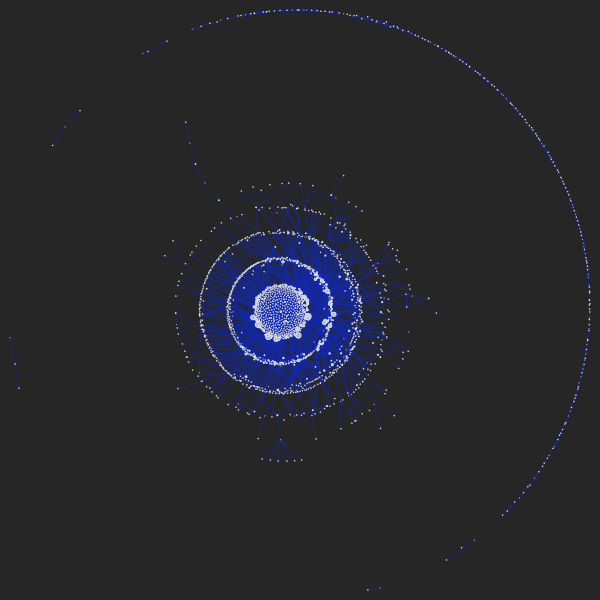

In [11]:
# Reply network 
EDGELIST_matrix_reply = pd.read_csv("reply_edgelist.csv", header = 0)
EG_reply = nx.DiGraph()
for index, tweet in EDGELIST_matrix_reply.iterrows():
    EG_reply.add_edge(tweet[0],tweet[1])

g_reply = EG_reply.degree()
sorted_nodes = sorted(g_reply.items(), key=operator.itemgetter(1), reverse = True)
sorted_nodes = sorted_nodes[0:1000]
topnodes = [i[0] for i in sorted_nodes]

GFW_reply_edgelist = nx.to_edgelist(EG_reply, nodelist=topnodes)

EG_top_reply = nx.DiGraph()
for i in GFW_reply_edgelist:   # this is rather STUPID conversion
    EG_top_reply.add_edge(i[0],i[1])
    
nx.write_graphml(EG_top_reply, "gfw_igraph_top_reply.graphml")

EDGELIST_igraph_reply = Graph.Read_GraphML("gfw_igraph_top_reply.graphml")

layout = EDGELIST_igraph_reply.layout("kk")
visual_style = {}
visual_style["vertex_size"] = [(size+1)*0.3 for size in EDGELIST_igraph_reply.indegree()] 
visual_style["edge_width"] = 0.4
visual_style["layout"] = layout
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 10
visual_style["edge_arrow_size"] = 0.2
visual_style["edge_arrow_width"] = 0.5
visual_style["vertex_shape"] = "circle"
visual_style["vertex_color"] = "#A9BAE0"
visual_style["edge_color"] = "#0E28BB"
background_color = "#262626"
plot(EDGELIST_igraph_reply, "GFW_reply_igraph.png", vertex_frame_color='#E0E0E0', background = background_color, autocurve = False, **visual_style)

In [10]:
g = EG_reply.out_degree()
sorted_nodes = sorted(g.items(), key=operator.itemgetter(1), reverse = True)
sorted_nodes = sorted_nodes[0:10]
sorted_nodes

[('123456ouyangli', 323),
 ('maylogcom', 19),
 ('vela1680', 19),
 ('godfather3721', 17),
 ('gehouhun', 17),
 ('beidaijin', 17),
 ('de175b5b8b4e425', 16),
 ('_0dc', 16),
 ('abin5689', 16),
 ('xiaolan65535', 13)]

In [ ]:
# THE FOLLOWING IS A TEST FOR WEIGHTED NETWORK, NO SUCCESS SO FAR!

#EDGELIST_matrix = pd.read_csv("rt_edgelist.csv", header = 0)
#EG_wt = nx.DiGraph()

#def add_edge(n1, n2, weight=None):
#    if not EG_wt.has_edge(n1,n2):
#        EG_wt.add_edge(n1,n2)
#        EG_wt[n1][n2]['weight']=1
#    else:
#        EG_wt[n1][n2]['weight']+=1

#for index, tweet in EDGELIST_matrix.iterrows():
#    add_edge(tweet[0], tweet[1])

#g = EG_wt.degree()
#sorted_nodes = sorted(g.items(), key=operator.itemgetter(1), reverse = True)
#sorted_nodes = sorted_nodes[0:499]
#topnodes = [i[0] for i in sorted_nodes]

#GFW_rt_edgelist_wt = nx.to_edgelist(EG_wt, nodelist=topnodes)

#EG_top = nx.DiGraph()
#for i in GFW_rt_edgelist_wt:   # this is rather STUPID conversion
#    EG_top.add_edge(i[0],i[1], weight = i[2]['weight'])

#for i in GFW_rt_edgelist_wt:   # this is rather STUPID conversion
#     add_edge(i[0], i[1])


nx.write_graphml(EG_top, "gfw_igraph_top_rt_wt.graphml")
nx.write_weighted_edgelist(EG_top, 'gfw_igraph_top_rt_wt.edgelist')

EDGELIST_igraph_rt = Graph.Read_GraphML("gfw_igraph_top_rt.graphml")
#EDGELIST_igraph_rt = Graph.Read_GraphML("gfw_igraph_top_rt.graphml")
